C:\Users\ath\AppData\Local\Temp\ipykernel_22336\3942443199.py:99: RuntimeWarning: divide by zero encountered in log10
  W = 20 * np.log10(W)  # get level in dB


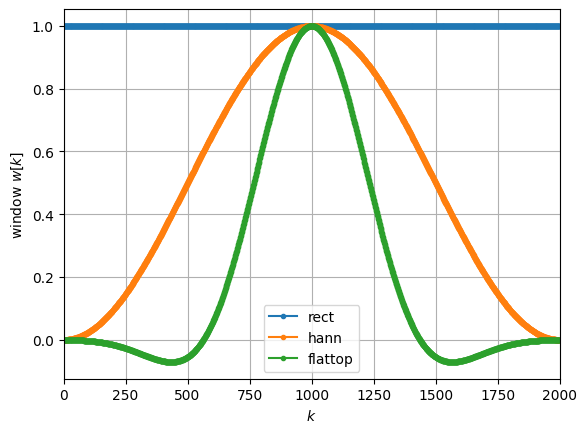

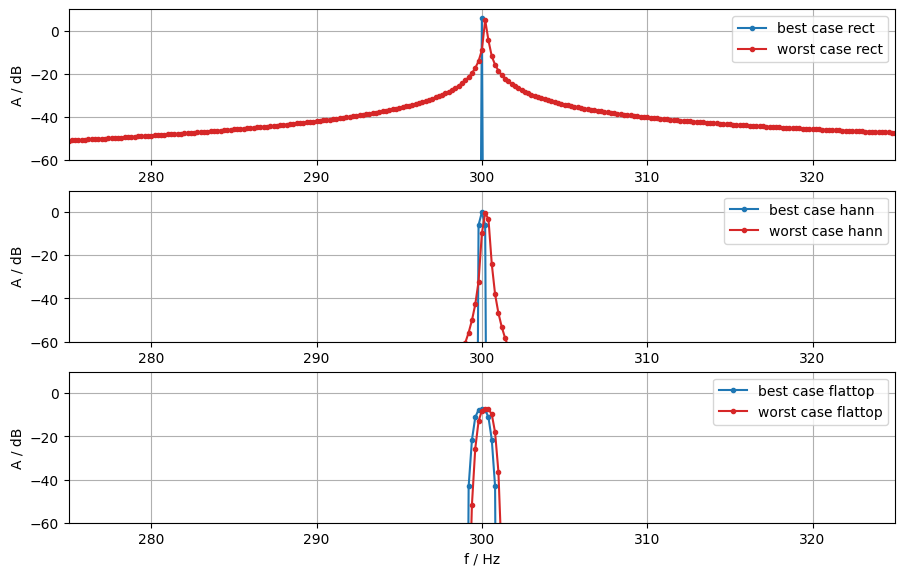

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.fft import fft, fftshift
from scipy.signal.windows import hann, flattop

# a)
f1 = 300     # Hz
f2 = 300.25  # Hz
f3 = 299.75  # Hz
xmax = 2     # Maximum amplitude
fs = 400     # Hz
N = 2000     # Number of samples
k = np.arange(N)
x1 = xmax * np.sin(2 * np.pi * f1 / fs * k)
x2 = xmax * np.sin(2 * np.pi * f2 / fs * k)
x3 = xmax * np.sin(2 * np.pi * f3 / fs * k)

# b)
wrect = np.ones(N)
whann = hann(N, sym=False)
wflattop = flattop(N, sym=False)
plt.plot(wrect, "C0o-", ms=3, label="rect")
plt.plot(whann, "C1o-", ms=3, label="hann")
plt.plot(wflattop, "C2o-", ms=3, label="flattop")
plt.xlabel(r"$k$")
plt.ylabel(r"window $w[k]$")
plt.xlim(0, N)
plt.legend()
plt.grid(True)

# c)
X1wrect = fft(x1)
X2wrect = fft(x2)
X3wrect = fft(x3)

X1whann = fft(x1 * whann)
X2whann = fft(x2 * whann)
X3whann = fft(x3 * whann)

X1wflattop = fft(x1 * wflattop)
X2wflattop = fft(x2 * wflattop)
X3wflattop = fft(x3 * wflattop)

# this handling is working for N even and odd:
def fft2db(X):
    N = X.size
    Xtmp = 2 / N * X  # independent of N, norm for sine amplitudes
    Xtmp[0] *= 1 / 2  # bin for f=0 Hz is existing only once, so cancel *2 from above
    if N % 2 == 0:  # fs/2 is included as a bin
        # fs/2 bin is existing only once, so cancel *2 from above
        Xtmp[N // 2] = Xtmp[N // 2] / 2
    return 20 * np.log10(np.abs(Xtmp))  # in dB


# setup of frequency vector this way is independent of N even/odd:
df = fs / N
f = np.arange(N) * df


plt.figure(figsize=(16 / 1.5, 10 / 1.5))
plt.subplot(3, 1, 1)
plt.plot(f, fft2db(X1wrect), "C0o-", ms=3, label="best case rect")
plt.plot(f, fft2db(X2wrect), "C3o-", ms=3, label="worst case rect")
plt.xlim(275, 325)  # Adjusted xlim for better visualization
plt.ylim(-60, 10)   # Adjusted ylim for better visualization
plt.legend()
plt.xlabel('f / Hz')
plt.ylabel("A / dB")
plt.grid(True)

plt.subplot(3, 1, 2)
plt.plot(f, fft2db(X1whann), "C0o-", ms=3, label="best case hann")
plt.plot(f, fft2db(X2whann), "C3o-", ms=3, label="worst case hann")
plt.xlim(275, 325)  # Adjusted xlim for better visualization
plt.ylim(-60, 10)   # Adjusted ylim for better visualization
plt.legend()
plt.xlabel('f / Hz')
plt.ylabel("A / dB")
plt.grid(True)

plt.subplot(3, 1, 3)
plt.plot(f, fft2db(X1wflattop), "C0o-", ms=3, label="best case flattop")
plt.plot(f, fft2db(X2wflattop), "C3o-", ms=3, label="worst case flattop")
plt.xlim(275, 325)  # Adjusted xlim for better visualization
plt.ylim(-60, 10)   # Adjusted ylim for better visualization
plt.legend()
plt.xlabel("f / Hz")
plt.ylabel("A / dB")
plt.grid(True)


def winDTFTdB(w):
    N = w.size  # get window length
    Nz = 100 * N  # zeropadding length
    W = np.zeros(Nz)  # allocate RAM
    W[0:N] = w  # insert window
    W = np.abs(fftshift(fft(W)))  # fft, fftshift and magnitude
    W /= np.max(W)  # normalize to maximum, i.e. the mainlobe maximum here
    W = 20 * np.log10(W)  # get level in dB
    # get appropriate digital frequencies
    Omega = 2 * np.pi / Nz * np.arange(Nz) - np.pi  # also shifted
    return Omega, W

plt.figure(figsize=(16, 12))
plt.subplot(4, 1, 1)
plt.plot([-np.pi, +np.pi], [-3.01, -3.01], "gray")  # mainlobe bandwidth
plt.plot([-np.pi, +np.pi], [-13.3, -13.3], "gray")  # rect max sidelobe
plt.plot([-np.pi, +np.pi], [-31.5, -31.5], "gray")  # hann max sidelobe
plt.plot([-np.pi, +np.pi], [-93.6, -93.6], "gray")  # flattop max sidelobe
Omega, W = winDTFTdB(wrect)
plt.plot(Omega, W, label="rect")
Omega, W = winDTFTdB(whann)
plt.plot(Omega, W, label="hann")
Omega, W = winDTFTdB(wflattop)
plt.plot(Omega, W, label="flattop")
plt.xlim(-np.pi, np.pi)
plt.ylim(-120, 10)

plt.xlim(-np.pi / 100, np.pi / 100)  # zoom into mainlobe

plt.xlabel(r"$\Omega$")
plt.ylabel(r"|W($\Omega$)| / dB")
plt.legend()
plt.grid(True)

